In [1]:
import numpy as np
import pandas as pd
from time import time
from datetime import datetime
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data/ks-projects-201801.csv")
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [2]:
cleaned_data = data[((data.state == 'failed') | (data.state == 'successful')) & (data.main_category == 'Technology')]

# Remove unnecessary predictors
removable_columns = ['ID', 'currency', 'goal', 'usd pledged', 'pledged', 'name', 'main_category']
cleaned_data = cleaned_data.drop(removable_columns, axis=1)

display(cleaned_data.describe())
display(cleaned_data.head())

,backers,usd_pledged_real,usd_goal_real
count,27050.00000,2.705000e+04,2.705000e+04
mean,186.14695,2.397673e+04,9.807654e+04
std,1228.11862,1.359790e+05,1.591295e+06
min,0.00000,0.000000e+00,7.500000e-01
25%,1.00000,1.100000e+01,5.009007e+03
50%,7.00000,3.600000e+02,1.800000e+04
75%,54.00000,5.515750e+03,5.000000e+04
max,105857.00000,6.225355e+06,1.101698e+08


,category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
65,Hardware,2015-07-03,2015-06-03 05:52:43,failed,0,CA,0.00,39739.31
67,Software,2017-07-02,2017-06-02 12:20:21,failed,0,GB,0.00,2579.35
71,Web,2016-08-23,2016-07-24 13:18:36,failed,3,US,141.00,100000.00
98,Gadgets,2015-03-07,2015-02-05 16:57:21,failed,3,CA,2.36,19632.48
112,Gadgets,2017-06-14,2017-05-10 16:00:18,failed,6,US,74.00,500.00


In [3]:
# add in variable for length of campaign

launched = [row.split(' ')[0] for row in cleaned_data['launched']]
deadline = [row for row in cleaned_data['deadline']]
date_list = list(zip(launched, deadline))

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

cleaned_data['campaign_length'] = [days_between(item[0], item[1]) for item in date_list]

# remove unnecessary predictors
cleaned_data = cleaned_data.drop(['launched', 'deadline'], axis=1)
display(cleaned_data.describe())

,backers,usd_pledged_real,usd_goal_real,campaign_length
count,27050.00000,2.705000e+04,2.705000e+04,27050.000000
mean,186.14695,2.397673e+04,9.807654e+04,35.264288
std,1228.11862,1.359790e+05,1.591295e+06,11.771582
min,0.00000,0.000000e+00,7.500000e-01,1.000000
25%,1.00000,1.100000e+01,5.009007e+03,30.000000
50%,7.00000,3.600000e+02,1.800000e+04,30.000000
75%,54.00000,5.515750e+03,5.000000e+04,40.000000
max,105857.00000,6.225355e+06,1.101698e+08,92.000000


In [4]:
# Per mentor suggestion, drop all observations where there are no backers.

cleaned_data = cleaned_data[cleaned_data.backers != 0]

def defineDollarsPerBacker(usd, backers):
    if backers > 0:
        return usd/backers
    else:
        return 0

cleaned_data['dollars_per_backer'] = [defineDollarsPerBacker(row[0], row[1]) for row in zip(cleaned_data['usd_pledged_real'], cleaned_data['backers'])]
cleaned_data.head()
cleaned_data.describe()

,backers,usd_pledged_real,usd_goal_real,campaign_length,dollars_per_backer
count,23021.000000,2.302100e+04,2.302100e+04,23021.000000,23021.000000
mean,218.725294,2.805294e+04,9.242104e+04,35.339864,113.135828
std,1328.582053,1.458886e+05,1.538887e+06,11.540013,235.300667
min,1.000000,4.900000e-01,7.500000e-01,1.000000,0.490000
25%,3.000000,7.000000e+01,5.345480e+03,30.000000,19.808967
50%,13.000000,8.350000e+02,1.889502e+04,30.000000,51.187500
75%,78.000000,8.426000e+03,5.000000e+04,40.000000,117.363750
max,105857.000000,6.225355e+06,1.101698e+08,92.000000,10000.000000


In [5]:
campaignslessthan5days = len(cleaned_data[(cleaned_data['campaign_length'] < 10.1)])
print("num campaigns less than 5 days: {}".format(campaignslessthan5days))

num campaigns less than 5 days: 195


(0.0, 2991.0)

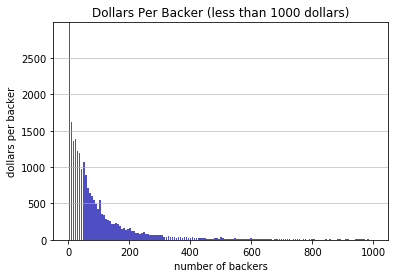

In [6]:
# visualize some of the vars

lessthan1k = cleaned_data[(cleaned_data['dollars_per_backer'] < 1000)]

n, bins, patches = plt.hist(x=lessthan1k['dollars_per_backer'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of backers')
plt.ylabel('dollars per backer')
plt.title('Dollars Per Backer (less than 1000 dollars)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=maxfreq)

(0.0, 3034.0)

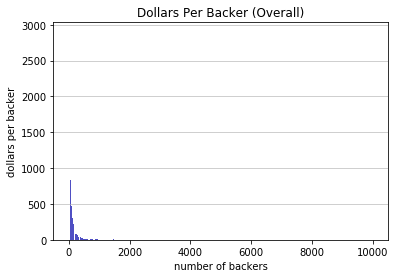

In [7]:
n, bins, patches = plt.hist(x=cleaned_data['dollars_per_backer'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of backers')
plt.ylabel('dollars per backer')
plt.title('Dollars Per Backer (Overall)')
plt.ylim(ymax=n.max())

In [8]:
shortcampaigns = cleaned_data[(cleaned_data['campaign_length'] < 10)]
morethan1k = cleaned_data[(cleaned_data['dollars_per_backer'] > 1000)]
smallGoals = cleaned_data[(cleaned_data['usd_goal_real'] < 100)]
largeGoals = cleaned_data[(cleaned_data['usd_goal_real'] > 100000)]
bigdreamslittleprospects = largeGoals[(largeGoals.backers < 10)]

print("num campaigns less than 10 days: {}".format(len(shortcampaigns)))
print("num campaigns with an average donation of more than 1000 dollars: {}".format(len(morethan1k)))
print("num campaigns with goals of more than 100k: {}".format(len(largeGoals)))
print("num campaigns with goals of less than 50: {}".format(len(smallGoals)))
print("num campaigns with goals of more than 100k but less than 10 backers: {}".format(len(bigdreamslittleprospects)))
print("num campaigns with goals of more than 200k: {}".format(len(cleaned_data[(cleaned_data['usd_goal_real'] > 200000)])))
print("num campaigns with goals of more than 1MM: {}".format(len(cleaned_data[(cleaned_data['usd_goal_real'] > 1000000)])))

num campaigns less than 10 days: 127
num campaigns with an average donation of more than 1000 dollars: 246
num campaigns with goals of more than 100k: 2089
num campaigns with goals of less than 50: 110
num campaigns with goals of more than 100k but less than 10 backers: 1176
num campaigns with goals of more than 200k: 966
num campaigns with goals of more than 1MM: 124


num campaigns with 100k+goals 21158


Text(0.5,1,'Goal in Dollars')

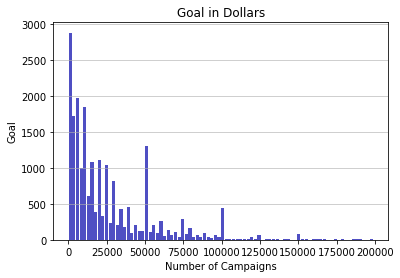

In [9]:
# Remove some of the outlandish data
cleaned_data = cleaned_data[(cleaned_data['usd_goal_real'] < 200000)]

cleaned_data = cleaned_data[(cleaned_data['usd_goal_real'] < 100000) | (cleaned_data['backers'] > 10)]


print("num campaigns with 100k+goals {}".format(len(cleaned_data)))

n, bins, patches = plt.hist(x=cleaned_data['usd_goal_real'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Campaigns')
plt.ylabel('Goal')
plt.title('Goal in Dollars')

In [10]:
cleaned_data.describe()

,backers,usd_pledged_real,usd_goal_real,campaign_length,dollars_per_backer
count,21158.000000,2.115800e+04,21158.000000,21158.000000,21158.000000
mean,218.457794,2.730662e+04,26353.372068,35.014983,109.956006
std,1136.753065,1.321855e+05,30054.727844,11.359346,209.611630
min,1.000000,4.900000e-01,0.750000,1.000000,0.490000
25%,3.000000,8.396250e+01,5000.000000,30.000000,20.548905
50%,15.000000,1.006555e+03,15000.000000,30.000000,52.473046
75%,87.000000,9.730448e+03,37824.240000,40.000000,116.676603
max,70122.000000,5.333793e+06,199004.980000,92.000000,5000.500000


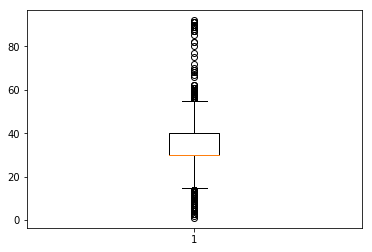

In [11]:
bp = plt.boxplot(x=cleaned_data['campaign_length'])

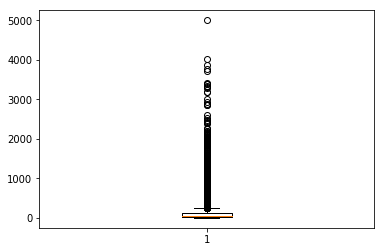

In [12]:
bp2 = plt.boxplot(x=cleaned_data['dollars_per_backer'])
cleaned_data = cleaned_data.drop(['backers', 'usd_pledged_real'], axis=1)

,usd_goal_real,campaign_length,dollars_per_backer
count,21158.000000,21158.000000,21158.000000
mean,9.402875,3.536112,3.840474
std,1.505824,0.314837,1.413164
min,0.559616,0.693147,0.398776
25%,8.517393,3.433987,3.070325
50%,9.615872,3.433987,3.979178
75%,10.540732,3.713572,4.767940
max,12.201090,4.532599,8.517493


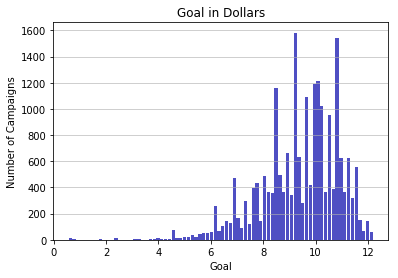

In [13]:
# Log transform some of these bad boys

yoodli = cleaned_data.copy(deep=True)
skewed = ['dollars_per_backer','usd_goal_real','campaign_length']
transformed_data = pd.DataFrame(data = yoodli)
transformed_data[skewed] = yoodli[skewed].apply(lambda x: np.log(x + 1))

n, bins, patches = plt.hist(x=transformed_data['usd_goal_real'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Goal')
plt.ylabel('Number of Campaigns')
plt.title('Goal in Dollars')
transformed_data.head()
transformed_data.describe()

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

scaledAndTransformedData = pd.DataFrame(data = transformed_data)
scaledAndTransformedData[skewed] = scaler.fit_transform(transformed_data[skewed])

In [15]:
# format dependent variable

def determineState(state):
    if state == 'successful':
        return 1
    else: 
        return 0

scaledAndTransformedData['outcome'] = [determineState(row) for row in scaledAndTransformedData['state']]
outcome = scaledAndTransformedData['outcome']
scaledAndTransformedData = scaledAndTransformedData.drop(['state', 'outcome'], axis=1)

In [16]:
# One hot encode variables
finalData = pd.get_dummies(scaledAndTransformedData)
finalData.head()
print(list(finalData.columns))

['usd_goal_real', 'campaign_length', 'dollars_per_backer', 'category_3D Printing', 'category_Apps', 'category_Camera Equipment', 'category_DIY Electronics', 'category_Fabrication Tools', 'category_Flight', 'category_Gadgets', 'category_Hardware', 'category_Makerspaces', 'category_Robots', 'category_Software', 'category_Sound', 'category_Space Exploration', 'category_Technology', 'category_Wearables', 'category_Web', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US']


In [17]:
# Actual testing
# shuffling and splitting the data

# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(finalData, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Outcomes training set has {} samples.".format(y_train.shape[0]))
print("Outcomes testing set has {} samples.".format(y_test.shape[0]))

Training set has 16926 samples.
Testing set has 4232 samples.
Outcomes training set has 16926 samples.
Outcomes testing set has 4232 samples.


/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
#     start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
#     end = time() # Get end time
    
    # TODO: Calculate the training time
#     results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
#     start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
#     end = time() # Get end time
    
    # TODO: Calculate the total prediction time
#     results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5, labels=None)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5, labels=None)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print('training accuracy is {} and testing accuracy is {}'.format(results['acc_train'], results['acc_test']))
        
    # Return the results
    return results

In [27]:
# naive predictions
import collections
counts = collections.Counter(outcome)
print(counts)

# TP = np.sum(income)
TP = counts[1]
print('TP is', TP)

FP = outcome.count() - TP
print('FP is', FP)

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5

def harmonicMeanCalculator(beta, precision, recall):
    harmonicMean = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    return harmonicMean

fscore = harmonicMeanCalculator(beta, precision, recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Counter({0: 14796, 1: 6362})
TP is 6362
FP is 14796
Naive Predictor: [Accuracy score: 0.3007, F-score: 0.3496]


In [60]:
import visuals as vs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from math import floor

clf_A = LogisticRegression(random_state=42)
# Bagged and boosted decision trees
# including bagged trees bc random forests only include some vars when estimating
clf_B = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=2), n_estimators = 20)
clf_C = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=2), n_estimators = 20)
# Boosted random forest
clf_D = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state=2), n_estimators = 20)


samples_100 = len(y_train)
samples_10 = floor(len(y_train)/10)
samples_1 = floor(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)
print(results)

LogisticRegression trained on 169 samples.
training accuracy is 0.77 and testing accuracy is 0.7206994328922496
LogisticRegression trained on 1692 samples.
training accuracy is 0.8 and testing accuracy is 0.7653591682419659
LogisticRegression trained on 16926 samples.
training accuracy is 0.7733333333333333 and testing accuracy is 0.7719754253308129
AdaBoostClassifier trained on 169 samples.
training accuracy is 0.86 and testing accuracy is 0.6916351606805293
AdaBoostClassifier trained on 1692 samples.
training accuracy is 1.0 and testing accuracy is 0.7110113421550095
AdaBoostClassifier trained on 16926 samples.
training accuracy is 1.0 and testing accuracy is 0.720226843100189
BaggingClassifier trained on 169 samples.
training accuracy is 0.88 and testing accuracy is 0.744328922495274
BaggingClassifier trained on 1692 samples.
training accuracy is 0.9966666666666667 and testing accuracy is 0.7400756143667296
BaggingClassifier trained on 16926 samples.
training accuracy is 0.996666666

In [ ]:
# Ok, so Random forest hyperparameters are:
# Maximum Depth
# Minimum number of samples per leaf
# Minimum number of samples per split
# Maximum number of features
# works by us training a lot of decision trees (on only some of the parameters?) and then having them vote

#bagging: 
# base_estimator
# The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.

# n_estimators
# The number of base estimators in the ensemble.

# max_samples
# The number of samples to draw from X to train each base estimator.

# max_features : int or float, optional (default=1.0)
# The number of features to draw from X to train each base estimator.

# base_estimator: The model utilized for the weak learners (Warning: Don't forget to import the model that you decide to use for the weak learner).
# n_estimators: The maximum number of weak learners used.
# Maximum Depth
# Minimum number of samples per leaf
# Minimum number of samples per split
# Maximum number of features

#boosting 
# base_estimator: The model utilized for the weak learners (Warning: Don't forget to import the model that you decide to use for the weak learner).
# n_estimators: The maximum number of weak learners used.                                                        

Unoptimized model
------
Accuracy score on testing data: 0.7193
F-score on testing data: 0.5167

Optimized Model
------
Final accuracy score on the testing data: 0.7299
Final F-score on the testing data: 0.5332


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
          learning_rate=0.15, n_estimators=60, random_state=None)


/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

Unoptimized model
------
Accuracy score on testing data: 0.7502
F-score on testing data: 0.5585

Optimized Model
------
Final accuracy score on the testing data: 0.7750
Final F-score on the testing data: 0.6073


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.9,
         max_samples=0.1, n_estimators=60, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


KeyboardInterrupt: 

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.9,
         max_samples=0.1, n_estimators=60, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [72]:
# Bagging and boosting DT models
def generateDTModels():
    dt_clf = DecisionTreeClassifier(random_state=2)

    parameters = {
        'min_samples_leaf' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        'min_samples_split' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    }
    scorer = make_scorer(fbeta_score, beta = 0.5)

    grid_obj = GridSearchCV(dt_clf, parameters, scoring = scorer)

    grid_fit = grid_obj.fit(X_train, y_train)

    best_clf = grid_fit.best_estimator_

    predictions = (dt_clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    print('best dt clf is', best_clf)
    
    clf_arr = [AdaBoostClassifier(base_estimator = best_clf), BaggingClassifier(base_estimator = best_clf)]
    clf_arr_names = ['ada boost', 'bagging']
    params_arr = [
        {
        'learning_rate' : [0.05, 0.1, 0.15, 0.2,  0.5, 0.75, 1],
        }, 
        {
        'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        }   
    ]
    
    for i, clf in enumerate(clf_arr):
        scorer = make_scorer(fbeta_score, beta = 0.5)

        grid_obj = GridSearchCV(clf, params_arr[i], scoring = scorer)

        grid_fit = grid_obj.fit(X_train, y_train)

        best_clf = grid_fit.best_estimator_

        predictions = (clf.fit(X_train, y_train)).predict(X_test)
        best_predictions = best_clf.predict(X_test)
        
        feature_importances = np.mean([
            tree.feature_importances_ for tree in best_clf.estimators_
        ], axis=0)

        # Report the before-and-afterscores
        print('results for the {} model'.format(clf_arr_names[i]))
        print("Unoptimized model\n------")
        print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
        print("\nOptimized Model\n------")
        print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
        print('feature importance for the {} model is {}'.format(clf_arr_names[i], feature_importances))

In [73]:
generateDTModels()

Unoptimized model
------
Accuracy score on testing data: 0.7254
F-score on testing data: 0.5264

Optimized Model
------
Final accuracy score on the testing data: 0.7644
Final F-score on the testing data: 0.5873
best dt clf is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0005, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')
results for the ada boost model
Unoptimized model
------
Accuracy score on testing data: 0.7394
F-score on testing data: 0.5494

Optimized Model
------
Final accuracy score on the testing data: 0.7727
Final F-score on the testing data: 0.6054
feature importance for the ada boost model is [2.42063555e-01 9.94577735e-02 4.58759124e-01 6.36776125e-03
 2.21361156e-02 4.06143965e-03 9.97190068e-03 2.47663369e-03
 2.92322

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

results for the bagging model
Unoptimized model
------
Accuracy score on testing data: 0.7765
F-score on testing data: 0.6109

Optimized Model
------
Final accuracy score on the testing data: 0.7784
Final F-score on the testing data: 0.6145
feature importance for the bagging model is [0.00382568 0.03891843 0.00600541 0.03314062 0.00277816 0.11361949
 0.00122926 0.04186182 0.02244427 0.01289787 0.0038584  0.00759469
 0.03112604 0.0332019  0.00435686 0.00660267 0.02726342 0.04045904
 0.05572467 0.0049994  0.05290386 0.00374308 0.0020921  0.03770714
 0.06185602 0.01150237 0.05716014 0.04502191 0.06331424 0.05529073
 0.01115139 0.05812861 0.03454556 0.0022077  0.00817929 0.00328775]


In [89]:
# Boosted and unboosted RF models
def generateRFModels(rf_clf):

    parameters = {
        'min_samples_leaf' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        'min_samples_split' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    }
    scorer = make_scorer(fbeta_score, beta = 0.5)

    grid_obj = GridSearchCV(rf_clf, parameters, scoring = scorer)

    grid_fit = grid_obj.fit(X_train, y_train)

    best_rf_clf = grid_fit.best_estimator_

    predictions = (rf_clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_rf_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    print('best dt clf is', best_clf)
    
    clf_arr = [AdaBoostClassifier(base_estimator = best_clf)]
    clf_arr_names = ['ada boost']
    params_arr = [
        {
        'learning_rate' : [0.05, 0.1, 0.15, 0.2,  0.5, 0.75, 1],
        }, 
        {
        'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        }   
    ]
    
    for i, clf in enumerate(clf_arr):
        scorer = make_scorer(fbeta_score, beta = 0.5)

        grid_obj = GridSearchCV(clf, params_arr[i], scoring = scorer)

        grid_fit = grid_obj.fit(X_train, y_train)

        best_clf = grid_fit.best_estimator_

        predictions = (clf.fit(X_train, y_train)).predict(X_test)
        best_predictions = best_clf.predict(X_test)
        
        feature_importances = np.mean([
            tree.feature_importances_ for tree in best_clf.estimators_
        ], axis=0)

        # Report the before-and-afterscores
        print('results for the {} model'.format(clf_arr_names[i]))
        print("Unoptimized model\n------")
        print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
        print("\nOptimized Model\n------")
        print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
        print('feature importance for the {} model is {}'.format(clf_arr_names[i], feature_importances))

In [90]:
rf_clf = RandomForestClassifier(random_state=2)
generateRFModels(rf_clf)

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Unoptimized model
------
Accuracy score on testing data: 0.7495
F-score on testing data: 0.5566

Optimized Model
------
Final accuracy score on the testing data: 0.7755
Final F-score on the testing data: 0.6084


UnboundLocalError: local variable 'best_clf' referenced before assignment

In [91]:
importances = best_rf_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

NameError: name 'best_rf_clf' is not defined

In [93]:
clf = LogisticRegression(random_state=42)
parameters = {'penalty': ['l1'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50]}

scorer = make_scorer(fbeta_score, beta = 0.5)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.7720
F-score on testing data: 0.6010

Optimized Model
------
Final accuracy score on the testing data: 0.7732
Final F-score on the testing data: 0.6039
